Team: Data Hunters

Membri: Luca Borrelli, Rainer Cabral Ilao

In [3]:
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

In [4]:
# Funzione per calcolare MRR per singola query
def calculate_mrr_for_query(results):
    mrr = 0
    for idx, entry in enumerate(results):
        if entry['relevance']:
            mrr = 1 / (idx + 1)  # Rango partendo da 1
            break
    return mrr

# Funzione per calcolare NDCG per singola query
def calculate_ndcg_for_query(results, k=10):
    dcg = 0
    idcg = 0
    relevance_scores = [entry['relevance_score'] for entry in results]
    relevance_scores.sort(reverse=True)  # Ordinamento per rilevanza ideale
    
    # Calcolo di DCG e IDCG
    for idx, entry in enumerate(results[:k]):
        rel = entry['relevance_score']
        dcg += rel / np.log2(idx + 2)  # Log base 2, posizioni partono da 1
        idcg += relevance_scores[idx] / np.log2(idx + 2)
    
    # NDCG normalizzato
    if idcg > 0:
        ndcg = dcg / idcg
    else:
        ndcg = 0
    return ndcg

# Funzione principale per leggere il file JSON e calcolare le metriche
def evaluate_metrics(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    query_ids = list(data.keys())
    mrr_values_query = []
    ndcg_values_query = []
    query_names = []
    query_times = []

    # Calcola MRR e NDCG per ogni query
    for query_id in query_ids:
        query = data[query_id]
        query_name = query['query']
        results = query['result']
        time = query["time(ms)"]
        
        # Calcola MRR e NDCG per la query
        mrr = calculate_mrr_for_query(results)
        ndcg = calculate_ndcg_for_query(results)
        
        # Aggiungi ai valori
        mrr_values_query.append(mrr)
        ndcg_values_query.append(ndcg)
        query_names.append(query_name)
        query_times.append(time)

    # Calcola la MRR e NDCG globali
    global_mrr = np.mean(mrr_values_query)
    global_ndcg = np.mean(ndcg_values_query)

    wrapped_query_names = [ "\n".join(wrap(name, width=30)) for name in query_names ]

    # Crea un DataFrame per visualizzare i risultati per singola query
    results_query_df = pd.DataFrame({
        'Query': wrapped_query_names,
        'Time': query_times,
        'MRR (Query)': mrr_values_query,
        'NDCG (Query)': ndcg_values_query
    })
    
    # Crea un DataFrame per visualizzare i risultati globali
    global_results_df = pd.DataFrame({
        'Metric': ['MRR (Global)', 'NDCG (Global)'],
        'Value': [global_mrr, global_ndcg]
    })
    
    # Visualizza le tabelle con Matplotlib
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Modificato in modo che le tabelle siano su righe separate
    
    # Visualizzazione della tabella per le singole query
    ax1.axis('tight')
    ax1.axis('off')
    table1 = ax1.table(cellText=results_query_df.values, colLabels=results_query_df.columns, loc='center', cellLoc='center')
    table1.auto_set_font_size(False)  # Disabilita l'impostazione automatica della dimensione del font
    table1.set_fontsize(12)  # Imposta la dimensione del font manualmente (puoi aumentarla se necessario)
    ax1.set_title('MRR & NDCG per singola query', fontsize=14)

    # Visualizzazione della tabella per i risultati globali
    ax2.axis('tight')
    ax2.axis('off')
    table2 = ax2.table(cellText=global_results_df.values, colLabels=global_results_df.columns, loc='center', cellLoc='center')
    table2.auto_set_font_size(False)  # Disabilita l'impostazione automatica della dimensione del font
    table2.set_fontsize(14)  # Imposta una dimensione del font maggiore per la seconda tabella
    ax2.set_title('MRR & NDCG Globali', fontsize=14)

    # Mostra le tabelle
    plt.tight_layout()
    plt.show()

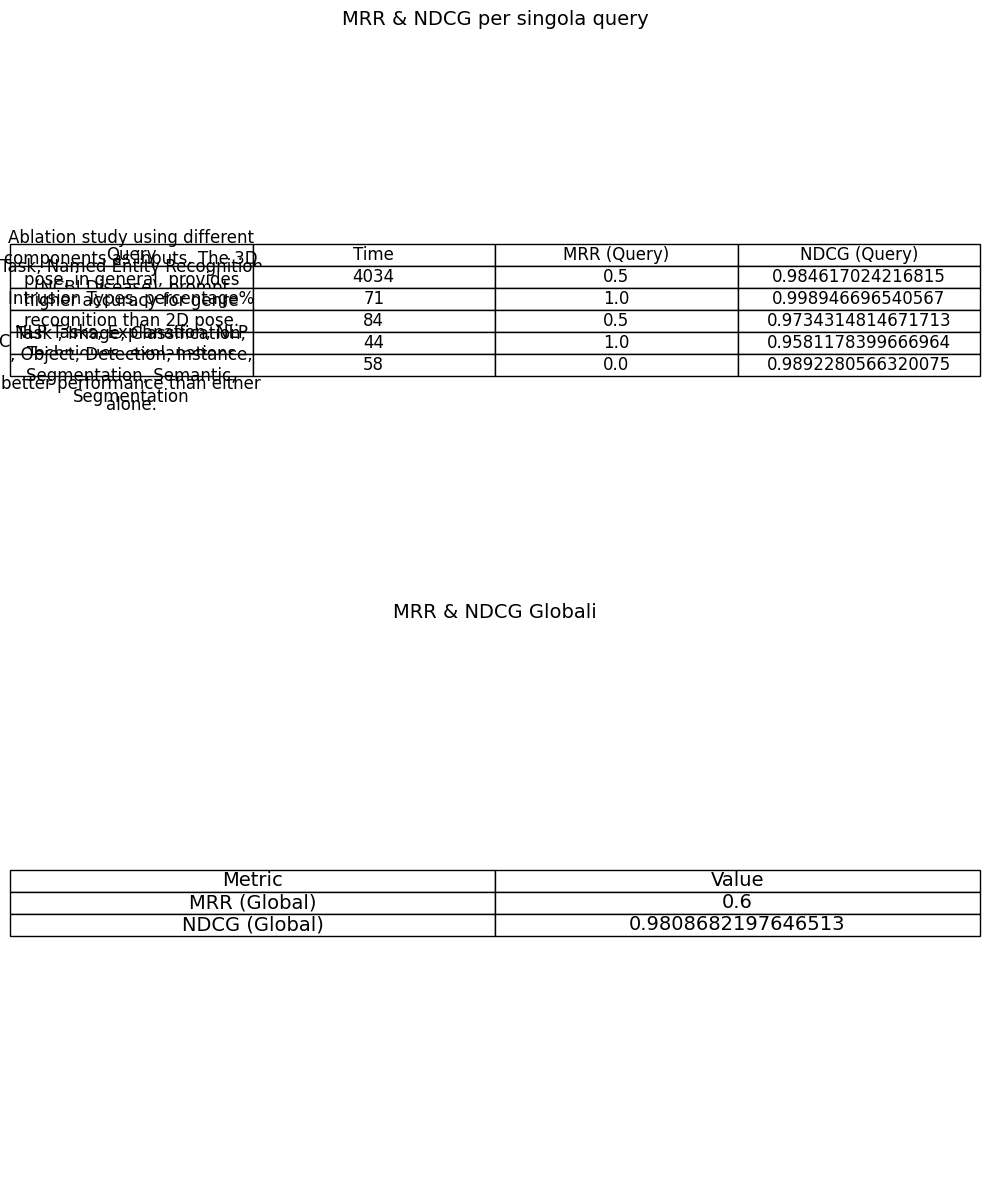

In [5]:
# Chiamata alla funzione con il path del file JSON
evaluate_metrics('../queries_stsb-bert-base.json')  # Sostituisci con il percorso del tuo file JSON

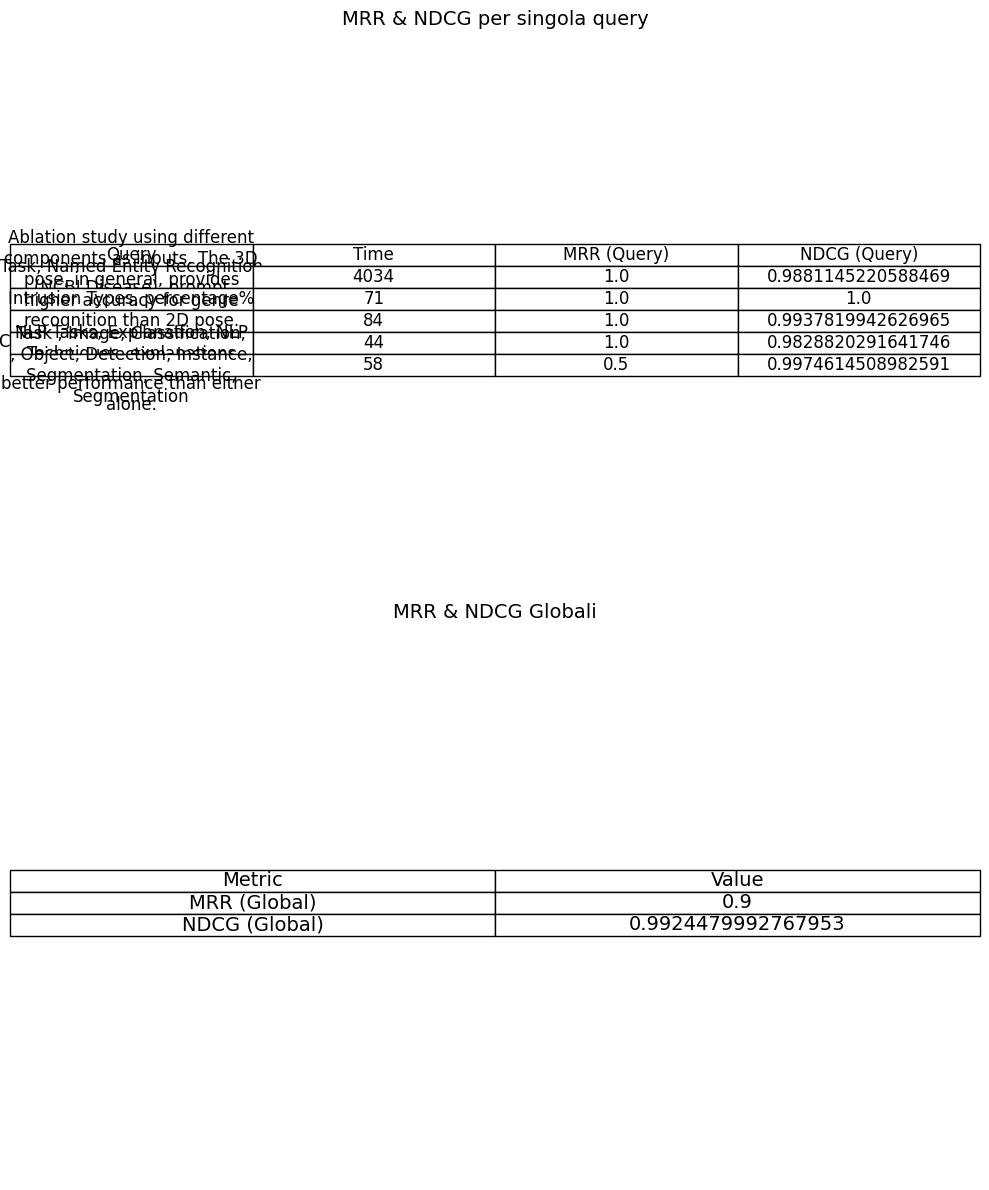

In [6]:
evaluate_metrics('../queries_all-mpnet-base-v2.json')

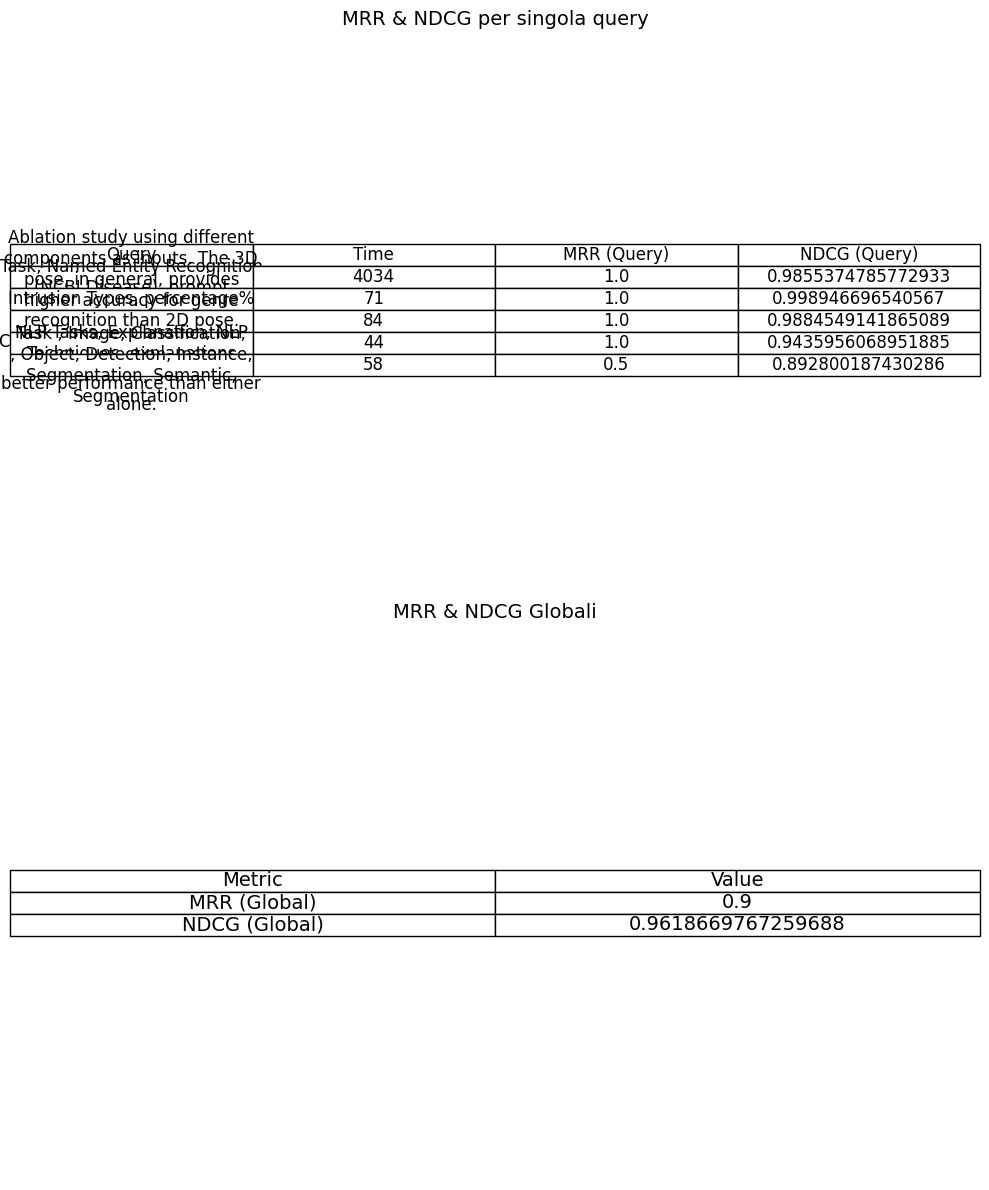

In [8]:
evaluate_metrics('../queries.json')